In [44]:
import numpy as np

# Function to calculate a0 and a1 for linear regression
def linear_regression(x, y):
    N = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    a1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    a0 = y_mean - a1 * x_mean
    
    return a0, a1
# Generate test data
np.random.seed(0) 
x_test = np.linspace(0, 10, 100)
y_test = 3.5 * x_test + 2  # Add  noise

# Apply the function to the test data
a0, a1 = linear_regression(x_test, y_test)
print(f"a0: {a0}, a1: {a1}")
# Function to calculate a0 and a1 with uncertainties
y_test_noisy = 3.5 * x_test + 2 + np.random.normal(0, 1, 100)
def linear_regression_with_uncertainty(x, y, sigma):
    weights = 1 / sigma**2
    x_mean = np.average(x, weights=weights)
    y_mean = np.average(y, weights=weights)
    
    a1 = np.sum(weights * (x - x_mean) * (y - y_mean)) / np.sum(weights * (x - x_mean)**2)
    a0 = y_mean - a1 * x_mean
    
    return a0, a1
# Define uncertainties for y-values
sigma_test = np.random.uniform(0.5, 1.5, size=y_test_noisy.shape)

# Call the linear regression function with uncertainties
a0_uncertainty, a1_uncertainty = linear_regression_with_uncertainty(x_test, y_test, sigma_test)

print(f"Adjusted a0: {a0_uncertainty}, Adjusted a1: {a1_uncertainty}")



a0: 2.0, a1: 3.5
Adjusted a0: 1.9999999999999964, Adjusted a1: 3.500000000000001


Fitted Parameters:
H0 = 4262.01
a1 = 3.23e+03
a2 = -9.09e+02


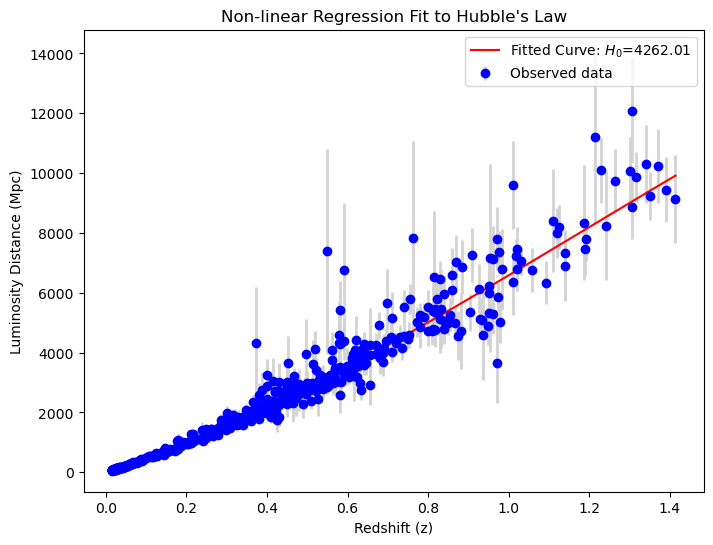

In [48]:
# Open and read the file content
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
with open('hubble_data.txt', 'r') as file:
    content = file.read()

# Split the content by commas to get individual rows
rows = content.split(',')

# Initialize lists to store the extracted columns
supernova_name = []
redshift = []
distance_modulus = []
distance_modulus_error = []

# Now iterate over the rows from row 45 (index 44) to row 624 (index 623)
for i, row in enumerate(rows[44:624]):
    # Remove any leading/trailing whitespace from each row
    clean_row = row.strip()
    clean_row = clean_row.replace('"', '').replace('\\t', '\t')
    #print(clean_row)
    #print(f"Split Columns: {columns} (Length: {len(columns)})")
    # Split each row by tabs to extract individual columns
    columns = clean_row.split('\t')
    
    # Append the extracted columns to respective lists
    supernova_name.append(columns[0])  
    redshift.append(float(columns[1]))  
    distance_modulus.append(float(columns[2]))  
    distance_modulus_error.append(float(columns[3])) 

# Now you can print or use the extracted data. For example:
#for i in range(len(supernova_name)):
#print(f"Supernova: {supernova_name[i]}, Redshift: {redshift[i]}, Distance Modulus: {distance_modulus[i]}, Error: {distance_modulus_error[i]}")
redshift = np.array(redshift)
distance_modulus = np.array(distance_modulus)
distance_modulus_error = np.array(distance_modulus_error)

# The formula is: D_L (Mpc) = 10^((distance_modulus + 5) / 5) / 1e6
luminosity_distance = 10 ** ((distance_modulus + 5) / 5) / 1e6

# Convert the distance modulus error to luminosity distance error
luminosity_distance_error = np.log(10) * (luminosity_distance * distance_modulus_error) / 5

def hubble_law_poly(z, H0, a1, a2):
    # Polynomial relationship: D_L(z) = H0 * z + a1 * z^2 + a2 * z^3
    return H0 * z + a1 * z**2 + a2 * z**3

initial_guess = [70, 0, 0]  # Initial guess for H0, a1, a2
params, covariance = curve_fit(hubble_law_poly, redshift, luminosity_distance, sigma=luminosity_distance_error, p0=initial_guess)

# Extract the fitted parameters
H0, a1, a2 = params

# Print the results
print(f"Fitted Parameters:\nH0 = {H0:.2f}\na1 = {a1:.2e}\na2 = {a2:.2e}")

#  Plot the results
plt.figure(figsize=(8, 6))
plt.errorbar(redshift, luminosity_distance, yerr=luminosity_distance_error, fmt='o', label='Observed data', color='blue', ecolor='lightgray', elinewidth=2, capsize=0)

#  the fitted curve
z_vals = np.linspace(min(redshift), max(redshift), 500)
fitted_curve = hubble_law_poly(z_vals, H0, a1, a2)
plt.plot(z_vals, fitted_curve, label=f'Fitted Curve: $H_0$={H0:.2f}', color='red')

plt.xlabel('Redshift (z)')
plt.ylabel('Luminosity Distance (Mpc)')
plt.title('Non-linear Regression Fit to Hubble\'s Law')
plt.legend()

plt.show()

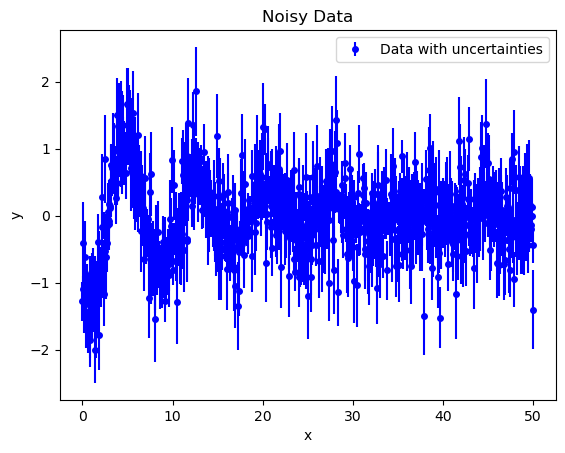

Best-fit parameters: [-1.34676878e+00  6.38792891e-02  8.00419935e-01 -7.82693639e-01
 -4.54301440e-04]
Parameter uncertainties: [0.00631476 0.00032854 0.00048781 0.00408668 0.00074981]


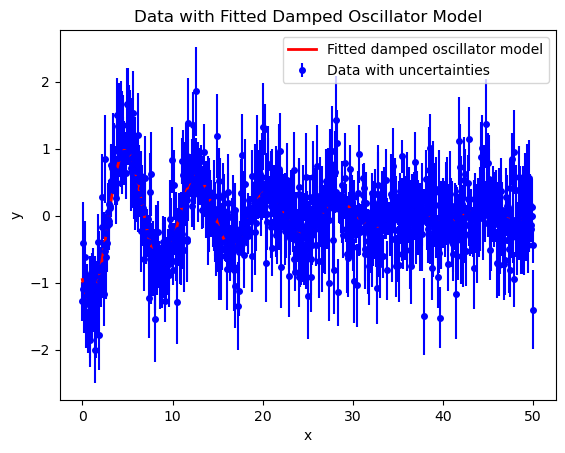

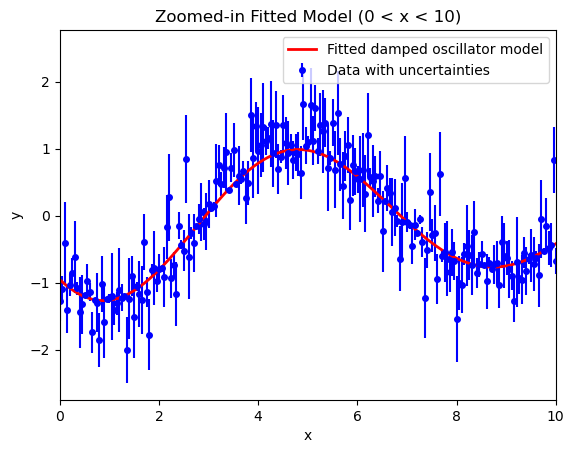

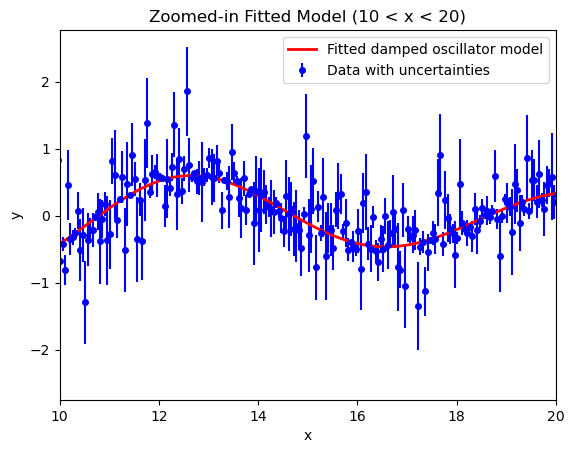

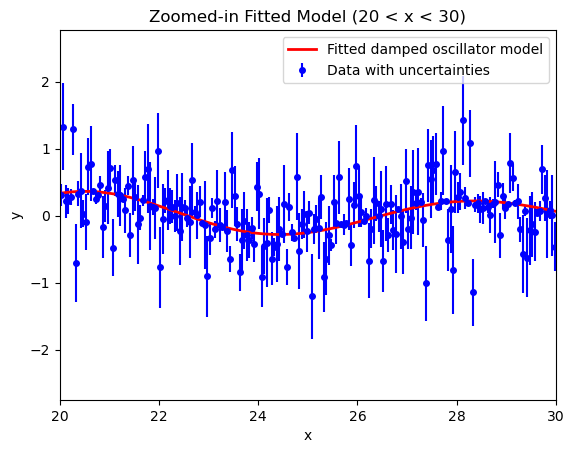

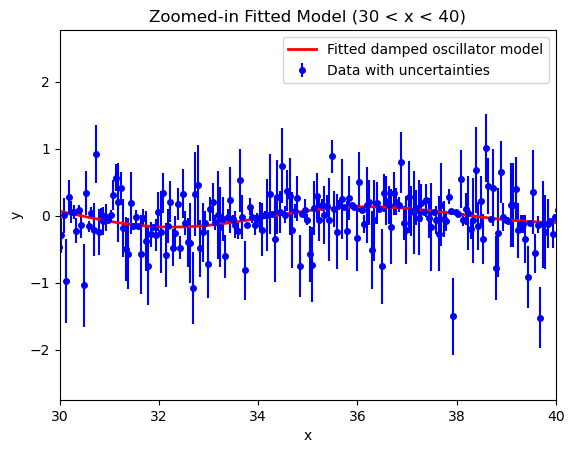

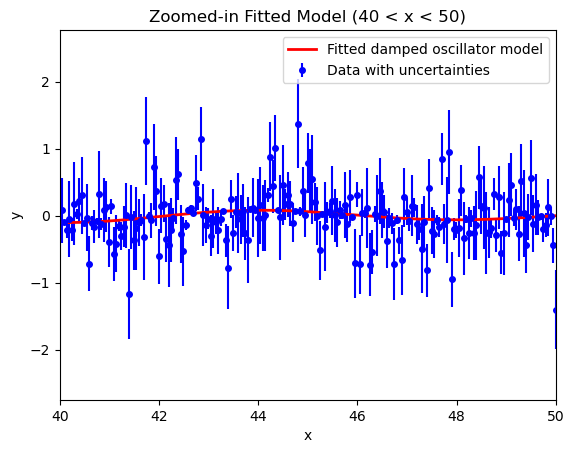

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# The system exhibts oscillatory motion 
with open('part3_data.txt', 'r') as file:
    content = file.read()

# Split the content by commas to extract individual values
rows = content.split(',')

# Initialize lists to hold the parsed data
x_data = []
y_data = []
y_uncertainty = []

# Iterate through rows and extract x, y, and y_uncertainty values
# Assuming data starts at row 41 and ends at row 1040
for i in range(40, 1040):
    # Strip extra characters such as quotes, '\r', and ']' from the data
    row = rows[i].strip().replace('"', '').replace('\\r', '').replace(']', '').split()
    
    try:
        x_data.append(float(row[0]))
        y_data.append(float(row[1]))
        y_uncertainty.append(float(row[2]))
    except ValueError as e:
        print(f"Error parsing row {i}: {row}")
        continue

# Convert the lists to numpy arrays for further processing
x_data = np.array(x_data)
y_data = np.array(y_data)
y_uncertainty = np.array(y_uncertainty)

plt.errorbar(x_data, y_data, yerr=y_uncertainty, fmt='o', markersize=4, label='Data with uncertainties', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy Data')
plt.legend()
plt.show()

# b)y(x) = A * exp(-alpha * x) * cos(beta * x + phi) + C
# y(x) = A * exp(-alpha * x) * cos(beta * x + phi) + C
# where:
# - A is the amplitude of oscillation
# - alpha is the damping factor, controlling how quickly the oscillations decay
# - beta is the angular frequency of the oscillation
# - phi is the phase shift
# - C is a constant offset

def damped_oscillator(x, A, alpha, beta, phi, C):
    return A * np.exp(-alpha * x) * np.cos(beta * x + phi) + C

#  Perform the nonlinear least-squares fit using curve_fit
initial_guess = [1.5, 0.05, 0.8, 0.0, 0.0]  
params, params_covariance = curve_fit(damped_oscillator, x_data, y_data, sigma=y_uncertainty, p0=initial_guess)

# Output the best-fit parameters and their uncertainties
print("Best-fit parameters:", params)
print("Parameter uncertainties:", np.sqrt(np.diag(params_covariance)))

# Plot the fitted model against the data with improved visualization
x_fit = np.linspace(min(x_data), max(x_data), 1000)
y_fit = damped_oscillator(x_fit, *params)

# Improve the plot with larger linewidth and clearer data points
plt.errorbar(x_data, y_data, yerr=y_uncertainty, fmt='o', markersize=4, color='blue', label='Data with uncertainties')
plt.plot(x_fit, y_fit, label='Fitted damped oscillator model', color='red', linewidth=2)  # Increased linewidth
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data with Fitted Damped Oscillator Model')
plt.legend()
plt.show()

# Optionally, zoom in on a smaller x range to highlight part of the fit

plt.errorbar(x_data, y_data, yerr=y_uncertainty, fmt='o', markersize=4, color='blue', label='Data with uncertainties')
plt.plot(x_fit, y_fit, label='Fitted damped oscillator model', color='red', linewidth=2)
plt.xlim(0, 10)  # Zoom in on the range from 0 to 10 for better visibility
plt.xlabel('x')
plt.ylabel('y')
plt.title('Zoomed-in Fitted Model (0 < x < 10)')
plt.legend()
plt.show()
plt.errorbar(x_data, y_data, yerr=y_uncertainty, fmt='o', markersize=4, color='blue', label='Data with uncertainties')
plt.plot(x_fit, y_fit, label='Fitted damped oscillator model', color='red', linewidth=2)
plt.xlim(10, 20)  # Zoom in on the range from 0 to 10 for better visibility
plt.xlabel('x')
plt.ylabel('y')
plt.title('Zoomed-in Fitted Model (10 < x < 20)')
plt.legend()
plt.show()
plt.errorbar(x_data, y_data, yerr=y_uncertainty, fmt='o', markersize=4, color='blue', label='Data with uncertainties')
plt.plot(x_fit, y_fit, label='Fitted damped oscillator model', color='red', linewidth=2)
plt.xlim(20, 30)  # Zoom in on the range from 0 to 10 for better visibility
plt.xlabel('x')
plt.ylabel('y')
plt.title('Zoomed-in Fitted Model (20 < x < 30)')
plt.legend()
plt.show()
plt.errorbar(x_data, y_data, yerr=y_uncertainty, fmt='o', markersize=4, color='blue', label='Data with uncertainties')
plt.plot(x_fit, y_fit, label='Fitted damped oscillator model', color='red', linewidth=2)
plt.xlim(30, 40)  
plt.xlabel('x')
plt.ylabel('y')
plt.title('Zoomed-in Fitted Model (30 < x < 40)')
plt.legend()
plt.show()
plt.errorbar(x_data, y_data, yerr=y_uncertainty, fmt='o', markersize=4, color='blue', label='Data with uncertainties')
plt.plot(x_fit, y_fit, label='Fitted damped oscillator model', color='red', linewidth=2)
plt.xlim(40, 50) 
plt.xlabel('x')
plt.ylabel('y')
plt.title('Zoomed-in Fitted Model (40 < x < 50)')
plt.legend()
plt.show()